# ANÁLISE EXPLORATÓRIA DE DADOS (AED)

* Parte fundamental do processo de Machine Learning;

* Permite conhecer e se familiarizar com os dados 

* Permite a geração de insights;

* Ajuda na compreensão do problema;

* Permite caminhar com as próprias "pernas".

## 1. EXPLORAÇÃO DE CONCEITOS

In [68]:
import numpy as np
import pandas as pd
import warnings
import math
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas_profiling

In [2]:
dados = pd.read_csv('state.csv', sep=",")


### 1.1 Algumas funcionalidades


In [3]:
dados.head()

State  Population  Murder.Rate Abbreviation
0     Alabama     4779736          5.7           AL
1      Alaska      710231          5.6           AK
2     Arizona     6392017          4.7           AZ
3    Arkansas     2915918          5.6           AR
4  California    37253956          4.4           CA

In [4]:
dados.tail()

State  Population  Murder.Rate Abbreviation
45       Virginia     8001024          4.1           VA
46     Washington     6724540          2.5           WA
47  West Virginia     1852994          4.0           WV
48      Wisconsin     5686986          2.9           WI
49        Wyoming      563626          2.7           WY

In [5]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


Tipos de dados: Contínuos, Discretos, Categóricos, Binários, Ordinais

### 1.2  Medidas de tendência central

 Média

In [6]:
dados['Population'].mean()

6162876.3

 Mediana

In [10]:
dados['Population'].median()

4436369.5

### 1.3 Medidas de Dispersão

Variância

In [8]:
dados['Population'].var()

46898327373394.445

Desvio Padrão

In [9]:
dados['Population'].std()

6848235.347401142

### 1.4 Explorando a distribuição de Dados

#### Percentis

In [11]:
np.percentile(dados['Murder.Rate'], 50)

4.0

In [12]:
def percentil(dados):
    p = []
    for i in range(1,101):
        p.append(np.percentile(dados['Murder.Rate'], i))
    df = pd.DataFrame(columns=['Percentil', 'Murder.Rate'])
    df['Murder.Rate'] = p
    df['Murder.Rate'] = df['Murder.Rate'].round(2)
    for i in range(len(df.Percentil)):
        df['Percentil'][i] = i+1
    df.set_index('Percentil', inplace=True)
    df = df.drop_duplicates(keep='last')
    return df

In [13]:
perc = percentil(dados)
perc.head()

<ipython-input-12-4b2b23bb5f2e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Percentil'][i] = i+1


Facilitando...

In [61]:
dados.describe()

Population  Murder.Rate
count  5.000000e+01    50.000000
mean   6.162876e+06     4.066000
std    6.848235e+06     1.915736
min    5.636260e+05     0.900000
25%    1.833004e+06     2.425000
50%    4.436370e+06     4.000000
75%    6.680312e+06     5.550000
max    3.725396e+07    10.300000

### 1.5 Boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x19c46c14760>,
 'caps': [<matplotlib.lines.Line2D at 0x19c46c14e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c46c14400>],
 'medians': [<matplotlib.lines.Line2D at 0x19c46caa520>],
 'fliers': [<matplotlib.lines.Line2D at 0x19c46caa880>],
 'means': []}

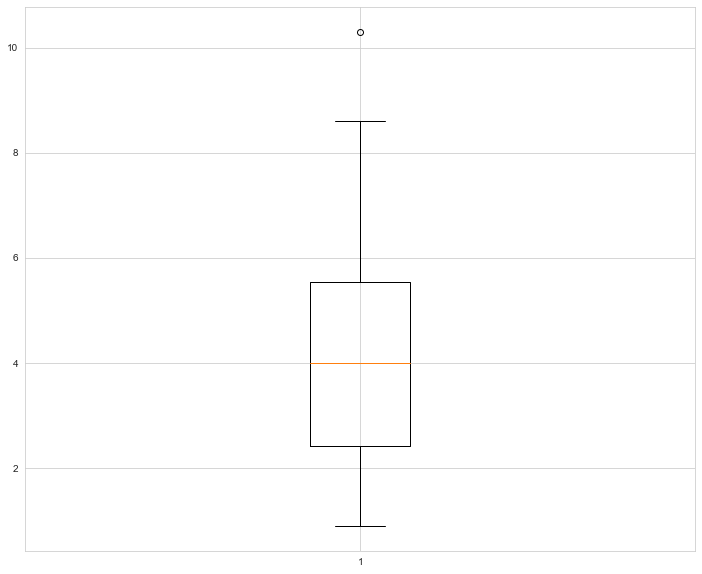

In [23]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,10))
plt.boxplot(dados['Murder.Rate'])

In [37]:
q3 = np.percentile(dados['Murder.Rate'], 75)
q1 = np.percentile(dados['Murder.Rate'], 25)
iqr = q3-q1
ls = q3 + 1.5*iqr
li = q1 - 1.5*iqr

### 1.6 Tabela de Frequências e Histogramas

In [48]:
df = dados['Population']
df.sort_values(ascending=True)

# Amplitude dos dados = Valor maior dos registros - menor valor
at = df.max() - df.min()

# Lembrando que k = raiz quadrada do total de registros/amostras
k = math.sqrt(len(df))
# O valor de amplitude de classe pode ser arredondado para um número inteiro, geralmente para facilitar a interpretação da tabela.
h = at/k 
h = math.ceil(h)

frequencias = []

# Menor valor da série
menor = round(df.min(),1)

# Menor valor somado a amplitude
menor_amp = round(menor+h,1)

valor = menor
while valor < df.max():
    frequencias.append('{} - {}'.format(round(valor,1),round(valor+h,1)))
    valor += h

freq_abs = pd.qcut(df,len(frequencias),labels=frequencias) # Discretização dos valores em k faixas, rotuladas pela lista criada anteriormente
print(pd.value_counts(freq_abs))

36885205 - 42074002    7
563626 - 5752423       7
31696408 - 36885205    6
26507611 - 31696408    6
21318814 - 26507611    6
16130017 - 21318814    6
10941220 - 16130017    6
5752423 - 10941220     6
Name: Population, dtype: int64


In [52]:
fig = px.histogram(dados, x="Population")
fig.show()

### 1.7 Estimativas de Densidade

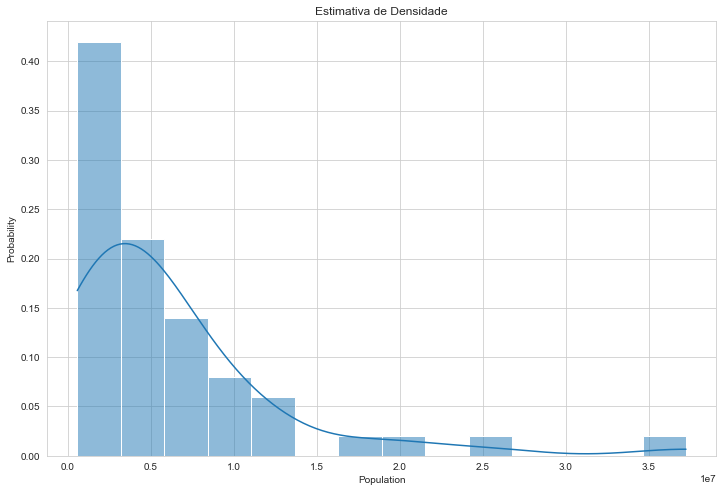

In [57]:
ax = sns.histplot(data = dados, x = "Population", kde = True, stat='probability').set_title("Estimativa de Densidade")
ax.figure.set_size_inches(12, 8)

## 2. Explorando dados

In [64]:
diabetes = pd.read_csv('diabetes.csv', sep=",")
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [65]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
diabetes['Outcome'] = np.where(diabetes.Outcome==1, 'POSITIVO', 'NEGATIVO')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age   Outcome  
0                     0.627   50  POSITIVO  
1                     0.351   31  NEGATIVO  
2                     0.672   32  POSITIVO  
3                     0.167   21  NEGATIVO  
4                     2.288   33  POSITIVO

In [67]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000                  0.243750   24.000000  
50%     32.000000                  0.372500   29.000000  
75%     36.600000                  0.626250   41.000000  
max     67.100000                  2.420000   81.000000

In [69]:
pandas_profiling.ProfileReport(diabetes)

Será que existe diferença entre positivos e naegativos quanto a idade?

In [70]:
px.box(diabetes, y='Age', x = 'Outcome')

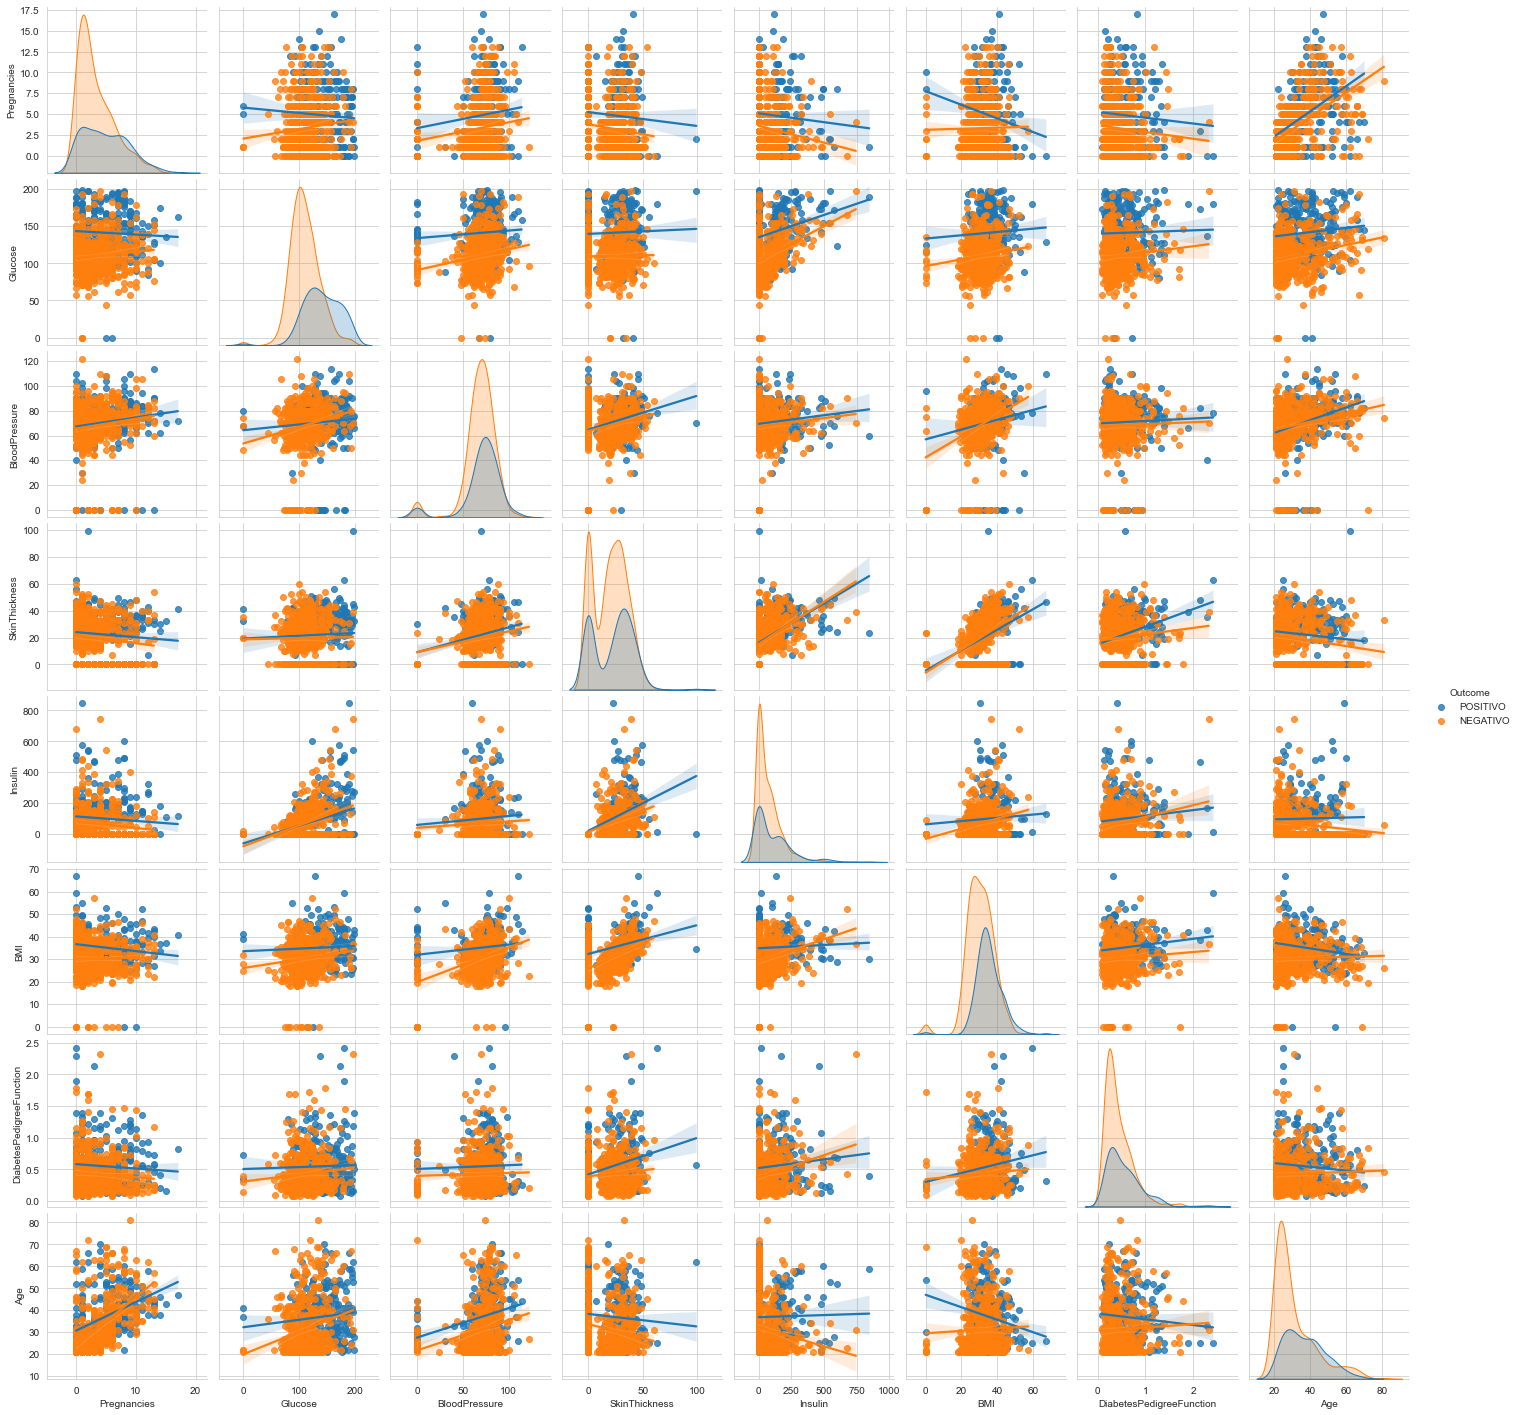

In [71]:
sns.pairplot(diabetes, hue='Outcome', kind='reg')